In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, pi, cos
from scipy.integrate import odeint, quad
from scipy import integrate
from scipy import special

### 1. Computing Bessel functions

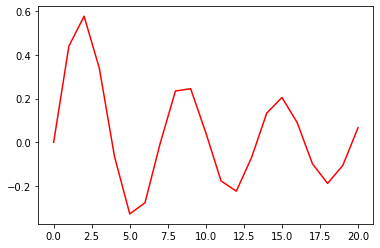

In [2]:
special_y = []
special_x = np.arange(0,21,1)
for x in special_x:
    special_y.append(special.j1(x))
plt.plot(special_x,special_y,'r')
plt.show()

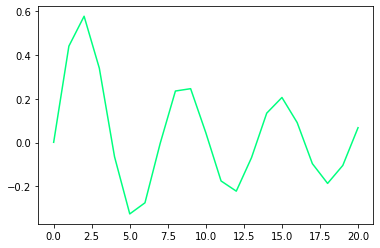

In [3]:
def J1(u,x):
    return (1/pi)*cos(u-x*sin(u))

trap_x = np.arange(0,21,1)
trap_y = []

for x in trap_x:
    u = np.linspace(0,pi,1001)
    trap = J1(u[0],x)+J1(u[-1],x)
    delta = u[1]-u[0]
    for k in u[:-1]:
        trap += 2*J1(k,x)
    trap *= delta/2
    trap_y.append(trap)

plt.plot(trap_x, trap_y, 'springgreen')
plt.show()

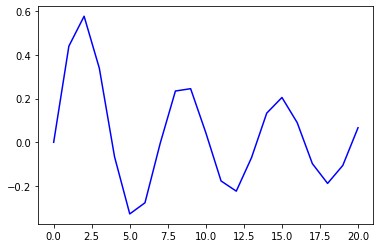

In [4]:
def J1(u,x):
    return (1/pi)*cos(u-x*sin(u))

quad_x = np.arange(0,21,1)
quad_y = []

for x in quad_x:
    quad_y.append(quad(J1,0,pi,args=(x))[0])

plt.plot(quad_x,quad_y,'b')
plt.show()

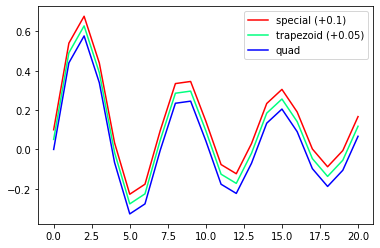

In [5]:
plt.plot(special_x,np.array(special_y)+0.1,'r',label='special (+0.1)')
plt.plot(trap_x, np.array(trap_y)+0.05, 'springgreen',label='trapezoid (+0.05)')
plt.plot(quad_x,np.array(quad_y),'b',label='quad')
plt.legend()
plt.show()

### 4. Solving ODEs: Euler algorithm for the Simple Harmonic Oscillator

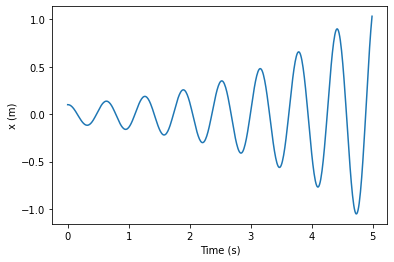

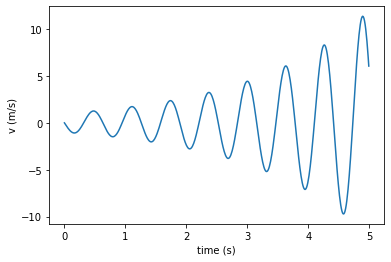

In [7]:
def euler(k, m, h, N, x_0, v_0):
    t = 0
    x = x_0
    v = v_0

    t_list = [t]
    x_list = [x]
    v_list = [v]
    e_list = [(m*v*v/2)+(k*x*x/2)]

    for _ in range(N - 1):
        x,v = x+h*v, v-h*k/m*x

        e = (m*v*v/2)+(k*x*x/2)
        t += h

        t_list.append(t)
        x_list.append(x)
        v_list.append(v)
        e_list.append(e)

    return t_list, x_list, v_list, e_list


t_list, x_list, v_list, e_list = euler(100, 1, 0.01, 500, 0.1, 0)
# (a)
plt.figure()
plt.plot(t_list, x_list)
plt.xlabel("Time (s)")
plt.ylabel("x (m)")
plt.show()
plt.figure()
plt.plot(t_list, v_list)
plt.xlabel("time (s)")
plt.ylabel("v (m/s)")
plt.show()

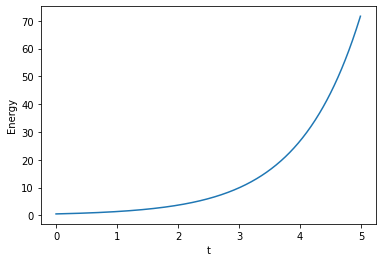

In [8]:
plt.figure()
plt.plot(t_list, e_list)
plt.xlabel("t")
plt.ylabel("Energy")
plt.show()

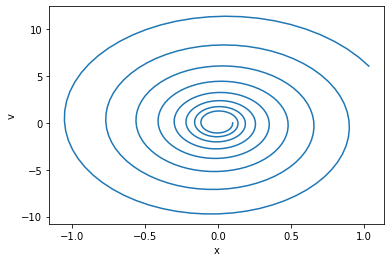

In [9]:
plt.figure()
plt.plot(x_list, v_list)
plt.xlabel("x")
plt.ylabel("v")
plt.show()

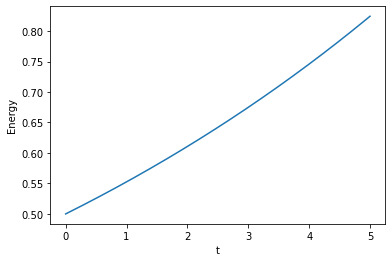

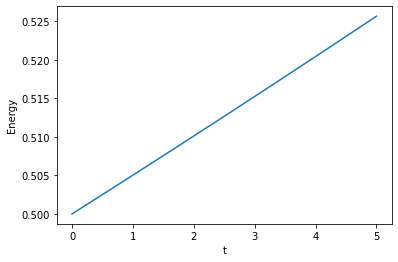

In [10]:
t_list, _, _, e_list = euler(100, 1, 0.001, 5000, 0.1, 0)
plt.figure()
plt.plot(t_list, e_list)
plt.xlabel("t")
plt.ylabel("Energy")
plt.show()
t_list, _, _, e_list = euler(100, 1, 0.0001, 50000, 0.1, 0)
plt.figure()
plt.plot(t_list, e_list)
plt.xlabel("t")
plt.ylabel("Energy")
plt.show()

oscillator energy keeps increasing in each plot, this happends because

### 5. Solving ODEs: Euler-Cromer algorithm

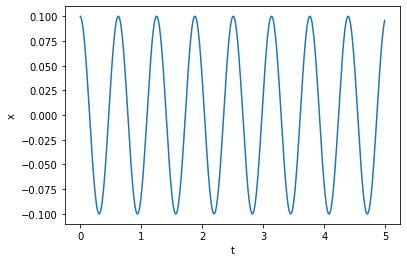

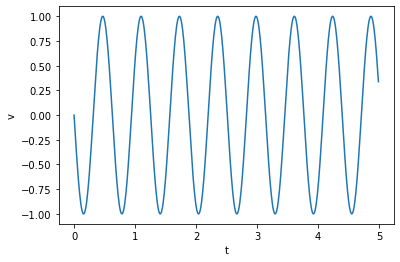

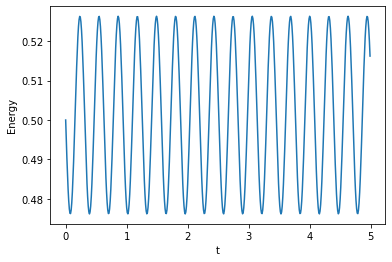

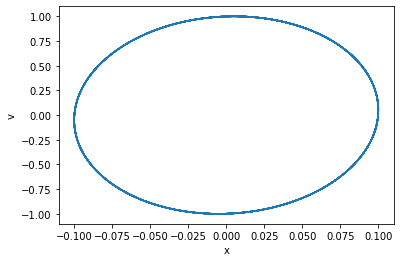

In [11]:
def euler_cromer(k, m, h, N, x_0, v_0):
    t = 0
    x = x_0
    v = v_0

    t_list = [t]
    x_list = [x]
    v_list = [v]
    e_list = [(m * v * v / 2) + (k * x * x / 2)]

    for _ in range(N - 1):
        v = v - h * k / m * x
        x = x + h * v

        e = (m * v * v / 2) + (k * x * x / 2)
        t += h

        t_list.append(t)
        x_list.append(x)
        v_list.append(v)
        e_list.append(e)

    return t_list, x_list, v_list, e_list


t_list, x_list, v_list, e_list = euler_cromer(100, 1, 0.01, 500, 0.1, 0)
# (a)
plt.figure()
plt.plot(t_list, x_list)
plt.xlabel("t")
plt.ylabel("x")
plt.show()
plt.figure()
plt.plot(t_list, v_list)
plt.xlabel("t")
plt.ylabel("v")
plt.show()

plt.figure()
plt.plot(t_list, e_list)
plt.xlabel("t")
plt.ylabel("Energy")
plt.show()

plt.figure()
plt.plot(x_list, v_list)
plt.xlabel("x")
plt.ylabel("v")
plt.show()

energy oscillates and positon oscillation stays constant as well resulting a a circle in phase space

### 6. 2nd order Runge-Kutta algorithm

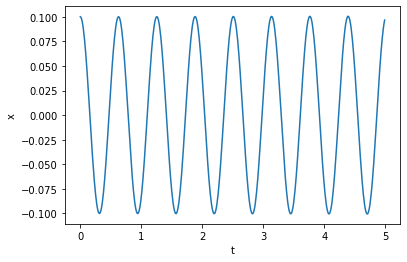

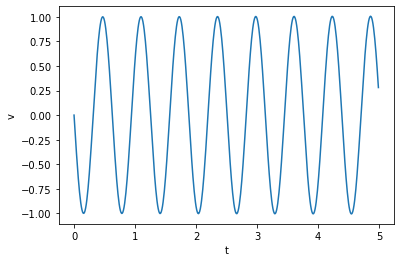

In [12]:
def runge_kutta(k, m, h, N, x_0, v_0):
    def fd(x, v, t):
        return v, -k / m * x

    t = 0
    x = x_0
    v = v_0

    t_list = [t]
    x_list = [x]
    v_list = [v]
    e_list = [(m * v * v / 2) + (k * x * x / 2)]

    for _ in range(N - 1):
        dx, dv = fd(x, v, t)
        xmid = x + (h / 2) * dx
        vmid = v + (h / 2) * dv
        tmid = t + (h / 2)
        dx, dv = fd(xmid, vmid, tmid)
        x += h * dx
        v += h * dv

        e = (m * v * v / 2) + (k * x * x / 2)
        t += h

        t_list.append(t)
        x_list.append(x)
        v_list.append(v)
        e_list.append(e)

    return t_list, x_list, v_list, e_list


t_list, x_list, v_list, e_list = runge_kutta(100, 1, 0.01, 500, 0.1, 0)
# (a)
plt.figure()
plt.plot(t_list, x_list)
plt.xlabel("t")
plt.ylabel("x")
plt.show()
plt.figure()
plt.plot(t_list, v_list)
plt.xlabel("t")
plt.ylabel("v")
plt.show()

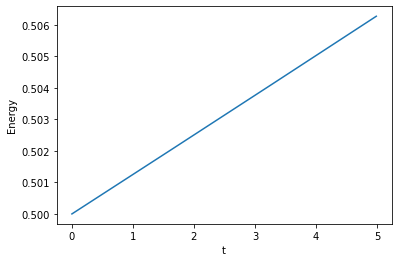

In [13]:
plt.figure()
plt.plot(t_list, e_list)
plt.xlabel("t")
plt.ylabel("Energy")
plt.show()

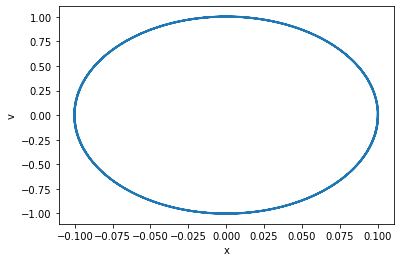

In [14]:
plt.figure()
plt.plot(x_list, v_list)
plt.xlabel("x")
plt.ylabel("v")
plt.show()

energy looks different but the results for the position time plots and phase space are the same